# Spam Filtering Project (exploratory data analysis) by using Naive Bayes Classifier

In [1]:
from os import walk 
from os.path import join
import sys
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

In [2]:
sys.getfilesystemencoding()

'utf-8'

In [3]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'
EXAMPLE_FILE

'SpamData/01_Processing/practice_email.txt'

In [4]:
stream = open(EXAMPLE_FILE, encoding = 'latin-1')

In [5]:
message = stream.read()

In [6]:
stream.close()

In [7]:
print(message)

From exmh-workers-admin@redhat.com  Wed Aug 21 16:46:03 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: yyyy@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7B74843C32
	for <jm@localhost>; Wed, 21 Aug 2002 11:46:03 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Wed, 21 Aug 2002 16:46:03 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7LFlwZ32032 for
    <jm-exmh@jmason.org>; Wed, 21 Aug 2002 16:47:58 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8ED1C3F0F1; Wed, 21 Aug 2002
    11:48:01 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp.spamassassin.tain

In [8]:
# spam data...

In [9]:
SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_CAT = 1

In [10]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding = 'latin-1')
            
            is_body = False
            
            lines = []
            
            for line in stream:
                
                if is_body:
                    
                    lines.append(line)
                    
                elif line == '\n':
                    
                    is_body = True
                    
            stream.close()
            
            email_body = '\n'.join(lines)
            
            yield file_name, email_body

In [11]:
def df_from_directory(path, classification):
    
    rows = []
    
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        
        rows.append({'MESSAGE' : email_body, 'CATEGORY' : classification})
        
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index = row_names)

In [12]:
df_from_directory(SPAM_1_PATH, SPAM_CAT)

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
00497.ebf699da617b11135f3aa9173b9781b9,<html>\n\n<head>\n\n<title>Untitled Document</...,1
00498.48c3098854d339353f1a28a13b196017,This is an HTML email message. If you see thi...,1
00499.988506a852cf86b396771a8bdc8cf839,<html>\n\n<head>\n\n</head>\n\n <body backgro...,1
00500.85b72f09f6778a085dc8b6821965a76f,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon...",1


In [13]:
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'

In [14]:
df_from_directory(SPAM_2_PATH, SPAM_CAT)

,MESSAGE,CATEGORY
00001.317e78fa8ee2f54cd4890fdc09ba8176,Greetings!\n\n\n\nYou are receiving this lette...,1
00002.9438920e9a55591b18e60d1ed37d992b,<html>\n\n<body>\n\n<center>\n\n<h3>\n\n<font ...,1
00003.590eff932f8704d8b0fcbe69d023b54d,<html>\n\n<body>\n\n<center>\n\n<b>\n\n<font c...,1
00004.bdcc075fa4beb5157b5dd6cd41d8887b,<html>\n\n<body>\n\n<center>\n\n<b>\n\n<font c...,1
00005.ed0aba4d386c5e62bc737cf3f0ed9589,"<html><xbody>\n\n<hr width = ""100%"">\n\n<cente...",1
...,...,...
01397.f75f0dd0dd923faefa3e9cc5ecb8c906,This is a multi-part message in MIME format.\n...,1
01398.8ca7045aae4184d56e8509dc5ad6d979,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1
01399.2319643317e2c5193d574e40a71809c2,****Mid-Summer Customer Appreciation SALE!****...,1
01400.b444b69845db2fa0a4693ca04e6ac5c5,ATTN:SIR/MADAN \n\n\n\n ...,1


In [15]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)

In [16]:
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))

In [17]:
spam_emails

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01397.f75f0dd0dd923faefa3e9cc5ecb8c906,This is a multi-part message in MIME format.\n...,1
01398.8ca7045aae4184d56e8509dc5ad6d979,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1
01399.2319643317e2c5193d574e40a71809c2,****Mid-Summer Customer Appreciation SALE!****...,1
01400.b444b69845db2fa0a4693ca04e6ac5c5,ATTN:SIR/MADAN \n\n\n\n ...,1


In [18]:
# non spam data....

In [19]:
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
HAM_CAT = 0

In [20]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)

In [21]:
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))

In [22]:
ham_emails

,MESSAGE,CATEGORY
00001 (2).7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002 (2).9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [23]:
# combine the spam and non spam data.....

In [24]:
data = pd.concat([spam_emails, ham_emails])
data

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [25]:
data.shape

(5801, 2)

In [26]:
type(data)

pandas.core.frame.DataFrame

In [27]:
# check the null values....

In [28]:
data['MESSAGE'].isnull()

00001.7848dde101aa985090474a91ec93fcf0    False
00002.d94f1b97e48ed3b553b3508d116e6a09    False
00003.2ee33bc6eacdb11f38d052c44819ba6c    False
00004.eac8de8d759b7e74154f142194282724    False
00005.57696a39d7d84318ce497886896bf90d    False
                                          ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6    False
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    False
01398.169b51731fe569f42169ae8f948ec676    False
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    False
01400.f897f0931e461e7b2e964d28e927c35e    False
Name: MESSAGE, Length: 5801, dtype: bool

In [29]:
data['MESSAGE'].isnull().values

array([False, False, False, ..., False, False, False])

In [30]:
data['MESSAGE'].isnull().sum()

0

In [31]:
# finding string values in data....

In [32]:
(data.MESSAGE.str.len() == 0).any() 

True

In [33]:
(data.MESSAGE.str.len() == 0).sum()

4

In [34]:
data[data.MESSAGE.str.len() == 0]

,MESSAGE,CATEGORY
cmds,,1
cmds,,1
cmds,,0
.yestee_antony.txt,,0


In [35]:
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds', '.yestee_antony.txt'], dtype='object')

In [36]:
# loc and drop the unwanted value... I mean delete the unwanted value....

In [37]:
print(data.index.get_loc('.yestee_antony.txt'))

4401


In [38]:
data[4400:4405]

,MESSAGE,CATEGORY
cmds,,0
.yestee_antony.txt,,0
00001.1a31cc283af0060967a233d26548a6ce,"Date: Tue, 20 Aug 2002 17:27:47 -05...",0
00002.5a587ae61666c5aa097c8e866aedcc59,--==_Exmh_-199405358P\n\nContent-Type: text/pl...,0
00003.19be8acd739ad589cd00d8425bac7115,--==_Exmh_-196335410P\n\nContent-Type: text/pl...,0


In [39]:
data.drop(['cmds', '.yestee_antony.txt'], inplace = True)

In [40]:
data

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [41]:
# finding range of data....

In [42]:
document_ids = range(0, len(data.index))
document_ids

range(0, 5797)

In [43]:
# add DOC_ID, FILE_NAME columns in data...

In [44]:
data['DOC_ID'] = document_ids

In [45]:
data

,MESSAGE,CATEGORY,DOC_ID
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4
...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5792
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5793
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5794
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5795


In [46]:
data['FILE_NAME'] = data.index

In [47]:
data

,MESSAGE,CATEGORY,DOC_ID,FILE_NAME
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0,00001.7848dde101aa985090474a91ec93fcf0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1,00002.d94f1b97e48ed3b553b3508d116e6a09
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2,00003.2ee33bc6eacdb11f38d052c44819ba6c
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3,00004.eac8de8d759b7e74154f142194282724
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5792,01396.61983fbe6ec43f55fd44e30fce24ffa6
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5793,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5794,01398.169b51731fe569f42169ae8f948ec676
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5795,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896


In [48]:
# set the DOC_ID as index column in data...

In [49]:
data.set_index('DOC_ID', inplace = True)

In [50]:
data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5792,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5793,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5794,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [51]:
# Store data in json file format....

In [52]:
DATA_JSON_FILE ='SpamData/01_Processing/email-text-data.json'
data.to_json(DATA_JSON_FILE)

In [53]:
# Data visualization....

In [54]:
# count the category values of data...

In [55]:
data.CATEGORY.value_counts()

0    3901
1    1896
Name: CATEGORY, dtype: int64

In [56]:
amount_of_spam = data.CATEGORY.value_counts()[1]
amount_of_spam

1896

In [57]:
amount_of_ham = data.CATEGORY.value_counts()[0]
amount_of_ham

3901

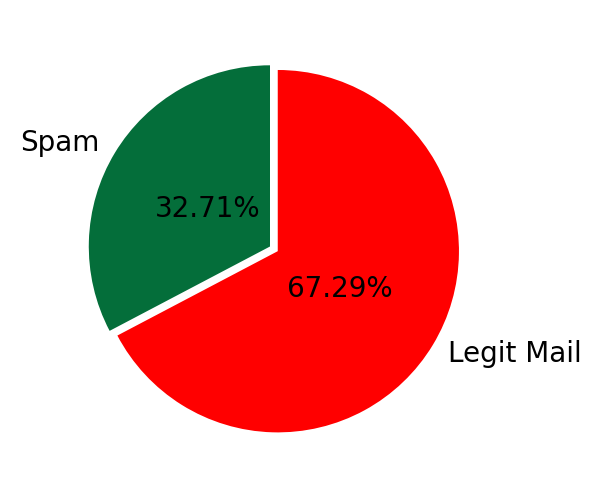

In [58]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colours = ['#046E3A', 'red']
plt.figure(figsize = (3,3), dpi = 200)
plt.pie(sizes, labels = category_names, textprops = {'fontsize': 10}, startangle = 90, colors = custom_colours, autopct = '%.2f%%', pctdistance = 0.4, explode = [0, 0.05])
plt.show()

In [59]:
# scrap the MESSAGE COLUMN in data using beautifulsoup....

In [60]:
data.at[5, 'MESSAGE']

'A POWERHOUSE GIFTING PROGRAM You Don\'t Want To Miss! \n\n \n\n  GET IN WITH THE FOUNDERS! \n\nThe MAJOR PLAYERS are on This ONE\n\nFor ONCE be where the PlayerS are\n\nThis is YOUR Private Invitation\n\n\n\nEXPERTS ARE CALLING THIS THE FASTEST WAY \n\nTO HUGE CASH FLOW EVER CONCEIVED\n\nLeverage $1,000 into $50,000 Over and Over Again\n\n\n\nTHE QUESTION HERE IS:\n\nYOU EITHER WANT TO BE WEALTHY \n\nOR YOU DON\'T!!!\n\nWHICH ONE ARE YOU?\n\nI am tossing you a financial lifeline and for your sake I \n\nHope you GRAB onto it and hold on tight For the Ride of youR life!\n\n\n\nTestimonials\n\n\n\nHear what average people are doing their first few days:\n\n\x93We\'ve received 8,000 in 1 day and we are doing that over and over again!\' Q.S. in AL\n\n \x93I\'m a single mother in FL and I\'ve received 12,000 in the last 4 days.\x94 D. S. in FL\n\n\x93I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!\x94 L.L. in KY\n\n\x93I didn\'t have the 

In [61]:
Soup = BeautifulSoup(data.at[5, 'MESSAGE'], 'html.parser')

In [62]:
print(Soup.prettify())

A POWERHOUSE GIFTING PROGRAM You Don't Want To Miss! 

 

  GET IN WITH THE FOUNDERS! 

The MAJOR PLAYERS are on This ONE

For ONCE be where the PlayerS are

This is YOUR Private Invitation



EXPERTS ARE CALLING THIS THE FASTEST WAY 

TO HUGE CASH FLOW EVER CONCEIVED

Leverage $1,000 into $50,000 Over and Over Again



THE QUESTION HERE IS:

YOU EITHER WANT TO BE WEALTHY 

OR YOU DON'T!!!

WHICH ONE ARE YOU?

I am tossing you a financial lifeline and for your sake I 

Hope you GRAB onto it and hold on tight For the Ride of youR life!



Testimonials



Hear what average people are doing their first few days:

We've received 8,000 in 1 day and we are doing that over and over again!' Q.S. in AL

 I'm a single mother in FL and I've received 12,000 in the last 4 days. D. S. in FL

I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day! L.L. in KY

I didn't have the money, so I found myself a partner to work this with. We have received $4,

In [63]:
# 

In [64]:
def clean_msg_no_html(message, stemmer = PorterStemmer(), stop_words = set(stopwords.words('english'))):
    
    soup = BeautifulSoup(message, 'html.parser')
    
    cleaned_text = soup.get_text()
    
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    
    for word in words:
        
        if word not in stop_words and word.isalpha():
            
            
            stemmed_word = stemmer.stem(word)
            
            filtered_words.append(stemmed_word)
            
            
    return filtered_words

In [65]:
clean_msg_no_html('hello fishing?....How are you doing?....cleaner and cleanest')

['hello', 'fish', 'cleaner', 'cleanest']

In [66]:
# Actual MESSAGE data.....

In [67]:
data['MESSAGE']

DOC_ID
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
3       ##############################################...
4       I thought you might like these:\n\n1) Slim Dow...
                              ...                        
5792    http://news.bbc.co.uk/1/hi/england/2515127.stm...
5793    > >-- be careful when using this one.) Also, t...
5794    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...
5795    So then, "Mark Hammond" <mhammond@skippinet.co...
5796    Hi there,\n\n\n\nNow this is probably of no us...
Name: MESSAGE, Length: 5797, dtype: object

In [68]:
type(data['MESSAGE'])

pandas.core.series.Series

In [69]:
# Apply the clean_msg_no_html format to MESSAGE data.....( to remove the html format and get the text)

In [70]:
nested_list = data['MESSAGE'].apply(clean_msg_no_html)
nested_list

C:\Users\MY-PC\anaconda3\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5792    [http, bizarr, collect, stuf, anim, could, fet...
5793    [care, use, one, also, realli, cute, thing, ja...
5794    [sm, skip, montanaro, write, jeremi, put, anot...
5795    [mark, hammond, like, given, zodb, sound, attr...
5796    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5797, dtype: object

In [71]:
len(nested_list)

5797

In [72]:
type(nested_list)

pandas.core.series.Series

In [73]:
# finding the how many texts in nested_list data.....

In [74]:
flat_nested_list = []

for sublist in nested_list:
    
    for item in sublist:
        
        flat_nested_list.append(item)

In [75]:
len(flat_nested_list)

759641

In [76]:
# for simplification... take first 10 texts.......

In [77]:
flat_nested_list[:10]

['save',
 'life',
 'insur',
 'spend',
 'life',
 'quot',
 'save',
 'g',
 'famili',
 'financi']

In [78]:
# finding texts in spam and ham......

In [79]:
doc_id_spam = data[data.CATEGORY == 1].index
doc_id_spam

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895],
           dtype='int64', name='DOC_ID', length=1896)

In [80]:
doc_id_ham = data[data.CATEGORY == 0].index
doc_id_ham

Int64Index([1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
            ...
            5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796],
           dtype='int64', name='DOC_ID', length=3901)

In [81]:
len(doc_id_spam)

1896

In [82]:
len(doc_id_ham)

3901

In [83]:
# showing with nested_list and doc_id_spam and ham.....

In [84]:
nested_list_spam = nested_list[doc_id_spam]
nested_list_spam

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, Length: 1896, dtype: object

In [85]:
nested_list_ham = nested_list[doc_id_ham]
nested_list_ham

DOC_ID
1896    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1897    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1898    [martin, post, tasso, papadopoulo, greek, scul...
1899    [martin, post, tasso, papadopoulo, greek, scul...
1900    [man, threaten, explos, moscow, thursday, augu...
                              ...                        
5792    [http, bizarr, collect, stuf, anim, could, fet...
5793    [care, use, one, also, realli, cute, thing, ja...
5794    [sm, skip, montanaro, write, jeremi, put, anot...
5795    [mark, hammond, like, given, zodb, sound, attr...
5796    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 3901, dtype: object

In [86]:
# checking lengths whether correct or not...

In [87]:
len(nested_list_spam)

1896

In [88]:
len(nested_list_ham)

3901

In [89]:
# Checking whether flat_list_spam and ham separetly and compare with flat_nested_list...need to be same..

In [90]:
flat_list_spam = []

for sublist in nested_list_spam:
    
    for item in sublist:
        
        flat_list_spam.append(item)

In [91]:
flat_list_ham = []

for sublist in nested_list_ham:
    
    for item in sublist:
        
        flat_list_ham.append(item)

In [92]:
len(flat_list_spam) + len(flat_list_ham)

759641

In [93]:
# or use list comprehension.... to make nested_list to flat_list....instead of nested for loop..

In [94]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]

In [95]:
len(flat_list_spam)

317499

In [96]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]

In [97]:
len(flat_list_ham)

442142

In [98]:
# check with above two lengths...and compare with nested_list...

In [99]:
len(flat_list_spam) + len(flat_list_ham)

759641

In [100]:
# finding longest email in nested_list....

In [101]:
email_lengths = []

for sublist in nested_list:
    
    email_lengths.append(len(sublist))

In [102]:
email_lengths[:10] # take first 10...

[92, 56, 44, 206, 45, 161, 47, 162, 203, 44]

In [103]:
max(email_lengths)

7671

In [104]:
# find longest email in total emails.... dataframes

In [105]:
np.argmax(email_lengths)

5776

In [106]:
data[5774:5779]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5774,\n\nForwarded-by: Nev Dull <nev@sleepycat.com>...,0,01378.363deaa0f90db14de13a4a676703826d
5775,use Perl Daily Headline Mailer\n\n\n\nCall for...,0,01379.7b9367f184ed0a8c46b6c8562b86caf8
5776,------------------------ Yahoo! Groups Sponsor...,0,01380.e3fad5af747d3a110008f94a046bf31b
5777,use Perl Daily Newsletter\n\n\n\nIn this issue...,0,01381.044d1085f7fec8bb04229da3d7887424
5778,Hi....\n\n\n\ni installed razor an SpamAssassi...,0,01382.492cd22357b171e9cbbb2ed73f9d551f


In [107]:
# loc the longest email....

In [108]:
data.iloc[5776 , 0]  # 5776 is DOC_ID

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

In [109]:
data # original data...

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5792,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5793,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5794,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [110]:
# try with different DOC_IDs...

In [111]:
data.iat[4,0] # DOC_ID - 4 , (iat selects a single scalar value in the DataFrame by integer location only.)

"I thought you might like these:\n\n1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim1\n\n\n\n2) Fight The Risk of Cancer! \n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 \n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice \n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1\n\n\n\nOffer Manager\n\nDaily-Deals\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?social@linux.ie%7C29%7C134077\n\n\n\n\n\n-- \n\nIrish Linux Users' Group Social Events: social@linux.ie\n\nhttp://www.linux.ie/mailman/listinfo/social for (un)subscription information.\n\nList maintainer: listmaster@linux.ie\n\n\n"

In [112]:
data.at[4, 'MESSAGE']  # DOC_ID - 4 , (at selects a single scalar value in the DataFrame by label only.)

"I thought you might like these:\n\n1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim1\n\n\n\n2) Fight The Risk of Cancer! \n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 \n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice \n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1\n\n\n\nOffer Manager\n\nDaily-Deals\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?social@linux.ie%7C29%7C134077\n\n\n\n\n\n-- \n\nIrish Linux Users' Group Social Events: social@linux.ie\n\nhttp://www.linux.ie/mailman/listinfo/social for (un)subscription information.\n\nList maintainer: listmaster@linux.ie\n\n\n"

In [113]:
data.iloc[4,0]   # DOC_ID - 4 , (iloc is integer position-based)

"I thought you might like these:\n\n1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim1\n\n\n\n2) Fight The Risk of Cancer! \n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 \n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice \n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1\n\n\n\nOffer Manager\n\nDaily-Deals\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?social@linux.ie%7C29%7C134077\n\n\n\n\n\n-- \n\nIrish Linux Users' Group Social Events: social@linux.ie\n\nhttp://www.linux.ie/mailman/listinfo/social for (un)subscription information.\n\nList maintainer: listmaster@linux.ie\n\n\n"

In [114]:
data.loc[4,'MESSAGE']  # doc_id - 4 , (loc is label-based)

"I thought you might like these:\n\n1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim1\n\n\n\n2) Fight The Risk of Cancer! \n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 \n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice \n\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1\n\n\n\nOffer Manager\n\nDaily-Deals\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?social@linux.ie%7C29%7C134077\n\n\n\n\n\n-- \n\nIrish Linux Users' Group Social Events: social@linux.ie\n\nhttp://www.linux.ie/mailman/listinfo/social for (un)subscription information.\n\nList maintainer: listmaster@linux.ie\n\n\n"

In [115]:
# take first 10 rows annd column of data.....to test selected dataframe

In [116]:
test_df = data.iloc[0:10, 0:3]

In [117]:
test_df

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
7,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
8,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab


In [118]:
# also try index as A,B,C,D... to the test_df...data...

In [119]:
test_df.index = ['A','B','C','D','E','F','G','I','J', 'L']

In [120]:
test_df

,MESSAGE,CATEGORY,FILE_NAME
A,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
B,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
C,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
D,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
E,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
F,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
G,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
I,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
J,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
L,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,00010.445affef4c70feec58f9198cfbc22997


In [121]:
# try select to find value in row and column in test_df data.....

In [122]:
test_df.iat[7,2]

'00008.dfd941deb10f5eed78b1594b131c9266'

In [123]:
test_df.at['I','FILE_NAME']

'00008.dfd941deb10f5eed78b1594b131c9266'

In [124]:
test_df.iloc[7,2]

'00008.dfd941deb10f5eed78b1594b131c9266'

In [125]:
test_df.loc['I','FILE_NAME']

'00008.dfd941deb10f5eed78b1594b131c9266'

In [126]:
# If we want to edit one of the FILE_NAME...

In [127]:
test_df.loc['L', 'FILE_NAME'] = 'HELLO AKSHAY'

In [128]:
test_df

,MESSAGE,CATEGORY,FILE_NAME
A,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
B,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
C,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
D,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
E,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
F,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
G,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
I,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
J,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
L,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,HELLO AKSHAY


In [129]:
test_df.iat[2,0] = 'MESSAGE BODY'

In [130]:
test_df

,MESSAGE,CATEGORY,FILE_NAME
A,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
B,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
C,MESSAGE BODY,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
D,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
E,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
F,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
G,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
I,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
J,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
L,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,HELLO AKSHAY


In [131]:
test_df.index.get_loc('L') # loc the edited value..

9

In [132]:
type(test_df.index)

pandas.core.indexes.base.Index

In [133]:
type(flat_nested_list)

list

In [134]:
#  find unique words in words data... with pandas..

In [135]:
unique_words = pd.Series(flat_nested_list).value_counts()

In [136]:
type(unique_words)

pandas.core.series.Series

In [137]:
unique_words

http        10660
use          5021
list         4851
email        4368
get          4201
            ...  
zoppi           1
aspers          1
deneb           1
dwheeler        1
oreilli         1
Length: 27334, dtype: int64

In [138]:
# find frequent words from unique_words... take first 2500 words..

In [139]:
frequent_words = unique_words[:2500]
frequent_words

http      10660
use        5021
list       4851
email      4368
get        4201
          ...  
flight       44
steven       43
manner       43
rapid        43
missil       43
Length: 2500, dtype: int64

In [140]:
frequent_words.index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'scope', 'asian', 'con', 'rm', 'telecommun', 'flight', 'steven',
       'manner', 'rapid', 'missil'],
      dtype='object', length=2500)

In [141]:
# frequent_words.index...make as column words...

In [142]:
vocab = pd.DataFrame({'VOCAB_WORD' : frequent_words.index})
vocab

,VOCAB_WORD
0,http
1,use
2,list
3,email
4,get
...,...
2495,flight
2496,steven
2497,manner
2498,rapid


In [143]:
vocab.index.name = 'WORD_ID'

In [144]:
vocab

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get
...,...
2495,flight
2496,steven
2497,manner


In [145]:
# vocab data store as csv file format...

In [146]:
WORD_ID_FILE = 'SpamData/01_Processing/word1-by-id.csv'
vocab.to_csv(WORD_ID_FILE, index_label = vocab.index.name, header = vocab.VOCAB_WORD.name)

In [147]:
vocab.VOCAB_WORD == 'AKSHAY KUMAR'

WORD_ID
0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Name: VOCAB_WORD, Length: 2500, dtype: bool

In [148]:
# Check whether word is there or not in data...

In [149]:
any(vocab.VOCAB_WORD == 'AKSHAY KUMAR')

False

In [150]:
any(vocab.VOCAB_WORD == 'flight')

True

In [151]:
# or also check like this 

In [152]:
'AKSHAY KUMAR' in set(vocab.VOCAB_WORD)

False

In [153]:
'flight' in set(vocab.VOCAB_WORD)

True

In [154]:
# .tolist() and .from_records ...... words are converted into table format....

In [155]:
type(nested_list)

pandas.core.series.Series

In [156]:
nested_list_after_tolist = nested_list.tolist()
type(nested_list_after_tolist)

list

In [157]:
word_columns_df = pd.DataFrame.from_records(nested_list_after_tolist)
word_columns_df

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,http,bizarr,collect,stuf,anim,could,fetch,sold,cornwal,museum,...,None,None,None,None,None,None,None,None,None,None
5793,care,use,one,also,realli,cute,thing,japanes,av,girl,...,None,None,None,None,None,None,None,None,None,None
5794,sm,skip,montanaro,write,jeremi,put,anoth,way,interest,hear,...,None,None,None,None,None,None,None,None,None,None
5795,mark,hammond,like,given,zodb,sound,attract,would,packag,hundr,...,None,None,None,None,None,None,None,None,None,None


In [158]:
word_columns_df.shape   # check the shape of word_columns_df...

(5797, 7671)

In [159]:
# 

In [160]:
x_train, x_test, y_train, y_test = train_test_split(word_columns_df, data.CATEGORY, test_size = 0.3, random_state = 42)

In [161]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
2890,hal,devor,sender,date,mon,sep,mon,sep,rick,rick,...,None,None,None,None,None,None,None,None,None,None
5070,thu,jul,matthia,saou,wrote,upon,time,matthia,wrote,see,...,None,None,None,None,None,None,None,None,None,None
1293,tremend,save,toner,inkjet,fax,thermal,replenish,toner,go,secret,...,None,None,None,None,None,None,None,None,None,None
4355,offici,failur,one,form,colleg,colleagu,yvett,cooper,mp,pontefract,...,None,None,None,None,None,None,None,None,None,None
4845,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None


In [162]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
3733,url,http,date,suppli,articl,scam,expert,beliv,mom,beat,...,None,None,None,None,None,None,None,None,None,None
4463,brian,wrote,howev,data,read,written,twice,sourc,tar,read,...,None,None,None,None,None,None,None,None,None,None
812,money,merchant,account,busi,start,new,busi,know,someon,abl,...,None,None,None,None,None,None,None,None,None,None
2627,origin,messag,john,hall,green,said,spot,owl,exist,would,...,None,None,None,None,None,None,None,None,None,None
2118,familiar,dell,dimens,xp,honest,familiar,comput,experi,china,motherboard,...,None,None,None,None,None,None,None,None,None,None


In [163]:
# x,y train,test name equal to DOC_ID..

In [164]:
x_train.index.name = y_train.index.name = 'DOC_ID'
x_test.index.name = y_test.index.name = 'DOC_ID'

In [165]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
2890,hal,devor,sender,date,mon,sep,mon,sep,rick,rick,...,None,None,None,None,None,None,None,None,None,None
5070,thu,jul,matthia,saou,wrote,upon,time,matthia,wrote,see,...,None,None,None,None,None,None,None,None,None,None
1293,tremend,save,toner,inkjet,fax,thermal,replenish,toner,go,secret,...,None,None,None,None,None,None,None,None,None,None
4355,offici,failur,one,form,colleg,colleagu,yvett,cooper,mp,pontefract,...,None,None,None,None,None,None,None,None,None,None
4845,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None


In [166]:
y_train.head()

DOC_ID
2890    0
5070    0
1293    1
4355    0
4845    0
Name: CATEGORY, dtype: int64

In [167]:
y_test.head()

DOC_ID
3733    0
4463    0
812     1
2627    0
2118    0
Name: CATEGORY, dtype: int64

In [168]:
vocab

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get
...,...
2495,flight
2496,steven
2497,manner


In [169]:
# If I know the word id , then I can know the word.....

In [170]:
vocab.at[2497, 'VOCAB_WORD']

'manner'

In [171]:
# If I know the word can I get the word_id.....getting the index as VOACB_WORD

In [172]:
word_index = pd.Index(vocab.VOCAB_WORD)
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'scope', 'asian', 'con', 'rm', 'telecommun', 'flight', 'steven',
       'manner', 'rapid', 'missil'],
      dtype='object', name='VOCAB_WORD', length=2500)

In [186]:
word_index.get_loc('missil')

2499

In [187]:
word_index.get_loc('http')

0

In [188]:
# 

In [189]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
2890,hal,devor,sender,date,mon,sep,mon,sep,rick,rick,...,None,None,None,None,None,None,None,None,None,None
5070,thu,jul,matthia,saou,wrote,upon,time,matthia,wrote,see,...,None,None,None,None,None,None,None,None,None,None
1293,tremend,save,toner,inkjet,fax,thermal,replenish,toner,go,secret,...,None,None,None,None,None,None,None,None,None,None
4355,offici,failur,one,form,colleg,colleagu,yvett,cooper,mp,pontefract,...,None,None,None,None,None,None,None,None,None,None
4845,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,url,http,date,tue,sep,gmt,overwork,world,web,develop,...,None,None,None,None,None,None,None,None,None,None
5191,paid,cuteftp,window,box,well,worth,money,despit,free,altern,...,None,None,None,None,None,None,None,None,None,None
5226,littl,tidbit,still,believ,scienc,opinion,poll,cheer,rah,http,...,None,None,None,None,None,None,None,None,None,None


In [190]:
y_train

DOC_ID
2890    0
5070    0
1293    1
4355    0
4845    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: CATEGORY, Length: 4057, dtype: int64

In [191]:
x_train.index[0] # DOC_ID

2890

In [192]:
y_train[2890]  # LABEL

0

In [193]:
OCCURENCE = 1

In [195]:
x_train.at[0,0]  # word

'save'

In [197]:
word_index.get_loc('save')

138

In [200]:
x_train.at[0,1]

'life'

In [201]:
word_index.get_loc('life')

118

In [202]:
x_train.index[1]

5070

In [204]:
def make_sparse_matrix(df, indexed_words, labels):
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            word = df.iat[i,j]
            
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                item = {'LABEL' : category, 'DOC_ID' : doc_id, 'OCCURANCE' : 1, 'WORD_ID' : word_id}
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)

In [205]:
sparse_train_df = make_sparse_matrix(x_train, word_index, y_train)
sparse_train_df

,LABEL,DOC_ID,OCCURANCE,WORD_ID
0,0,2890,1,971
1,0,2890,1,76
2,0,2890,1,767
3,0,2890,1,328
4,0,2890,1,767
...,...,...,...,...
429213,1,860,1,47
429214,1,860,1,1430
429215,1,860,1,26
429216,1,860,1,21


In [208]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped

OCCURANCE
DOC_ID WORD_ID LABEL           
0      2       1              1
       3       1              2
       4       1              1
       7       1              3
       11      1              1
...                         ...
5796   2035    0              2
       2038    0              1
       2234    0              1
       2328    0              1
       2381    0              1

[258802 rows x 1 columns]

In [209]:
train_grouped = train_grouped.reset_index()
train_grouped

,DOC_ID,WORD_ID,LABEL,OCCURANCE
0,0,2,1,1
1,0,3,1,2
2,0,4,1,1
3,0,7,1,3
4,0,11,1,1
...,...,...,...,...
258797,5796,2035,0,2
258798,5796,2038,0,1
258799,5796,2234,0,1
258800,5796,2328,0,1


In [210]:
TRAINING_DATA_FILE = 'SpamData/02_Training/train_data.txt'
np.savetxt(TRAINING_DATA_FILE, train_grouped,  fmt='%.18e')

In [211]:
sparse_test_df = make_sparse_matrix(x_test, word_index, y_test)
sparse_test_df

,LABEL,DOC_ID,OCCURANCE,WORD_ID
0,0,3733,1,109
1,0,3733,1,0
2,0,3733,1,76
3,0,3733,1,339
4,0,3733,1,614
...,...,...,...,...
203430,0,3375,1,250
203431,0,3375,1,0
203432,0,3375,1,5
203433,0,3375,1,2


In [217]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped

,DOC_ID,WORD_ID,LABEL,index,OCCURANCE
0,8,2,1,31206,1
1,8,3,1,124771,4
2,8,4,1,62224,2
3,8,5,1,31219,1
4,8,6,1,62171,2
...,...,...,...,...,...
117380,5791,1354,0,6719,1
117381,5791,1597,0,6715,1
117382,5791,1664,0,6738,1
117383,5791,2086,0,6774,1


In [218]:
TEST_DATA_FILE = 'SpamData/02_Training/test_data.txt'
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%.18e')

In [220]:
len(test_grouped.DOC_ID.unique())

1725

In [221]:
len(x_test)

1740

In [222]:
no_of_test_mails_lost = len(x_test) - len(test_grouped.DOC_ID.unique())
no_of_test_mails_lost

15

In [223]:
len(train_grouped.DOC_ID.unique())

4013

In [224]:
len(x_train)

4057

In [225]:
no_of_train_mails_lost = len(x_train) - len(train_grouped.DOC_ID.unique())
no_of_train_mails_lost

44